In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [22]:
f = open("PWM vs ENC.txt", "r")
data = []
for x in f:
    data.append(x)

In [23]:
data_L = []
data_R = []
for i in data[:-1]:
    data_L.append(float(i[:-1].split(" ")[1]))
    data_R.append(float(i[:-1].split(" ")[2]))

l = int(len(data_L)/2)
data_L1 = data_L[:l]
data_L2 = data_L[l:]
data_R1 = data_R[:l]
data_R2 = data_R[l:]

In [24]:
data_L_avg = []
data_R_avg = []
for i in range(l):
    data_L_avg.append((data_L1[i]+data_L2[-(i+1)])/2)
    data_R_avg.append((data_R1[i]+data_R2[-(i+1)])/2)

In [25]:
for i in range(l):
    if data_L_avg[i] > 0:
        L_begin = i
        break
for i in range(l):
    if data_R_avg[i] > 0:
        R_begin = i
        break
        
print(L_begin)
print(R_begin)

23
24


In [26]:
L = []
R = []
for i in range(L_begin,l):
    L.append(i)
for i in range(R_begin,l):
    R.append(i)
    
#print(L)

In [27]:
data_L_avg_filtered = data_L_avg[L_begin:]
data_R_avg_filtered = data_R_avg[R_begin:]

L_2D = np.array(L).reshape(-1,1)
R_2D = np.array(R).reshape(-1,1)
data_L_avg_filtered_2D = np.array(data_L_avg_filtered).reshape(-1,1)
data_R_avg_filtered_2D = np.array(data_R_avg_filtered).reshape(-1,1)

print(data_L_avg_filtered)

[0.005, 0.045, 0.06, 0.12000000000000001, 0.14500000000000002, 0.175, 0.2, 0.22499999999999998, 0.25, 0.28, 0.305, 0.33499999999999996, 0.36, 0.395, 0.42500000000000004, 0.46499999999999997, 0.49, 0.525, 0.56, 0.585, 0.625, 0.655, 0.6950000000000001, 0.725, 0.755, 0.79, 0.835, 0.87, 0.905, 0.94, 0.97, 1.01, 1.045, 1.085, 1.1099999999999999, 1.15, 1.185, 1.22, 1.255, 1.2850000000000001, 1.335, 1.3599999999999999, 1.395, 1.435, 1.475, 1.5, 1.525, 1.57, 1.605, 1.635, 1.67, 1.705, 1.7349999999999999, 1.7650000000000001, 1.81, 1.8399999999999999, 1.875, 1.915, 1.935, 1.97, 2.0, 2.035, 2.0700000000000003, 2.0999999999999996, 2.13, 2.17, 2.1950000000000003, 2.23, 2.25, 2.285, 2.3099999999999996, 2.3499999999999996, 2.38, 2.4050000000000002, 2.435, 2.46, 2.5, 2.52, 2.55, 2.575, 2.615, 2.64, 2.665, 2.685, 2.715, 2.745, 2.77, 2.795, 2.82, 2.855, 2.88, 2.9, 2.93, 2.95, 2.98, 2.995, 3.03, 3.0549999999999997, 3.075, 3.0949999999999998, 3.115, 3.145, 3.165, 3.1900000000000004, 3.215, 3.2350000000000

In [28]:
regression = linear_model.LinearRegression(fit_intercept = True)
regression.fit(L_2D, data_L_avg_filtered_2D)
Coefficients_L = regression.coef_
Ïnercept_L = regression.intercept_
print("Coefficients_L: \n", Coefficients_L)
print("Ïnercept_L: \n", Ïnercept_L)

regression.fit(R_2D, data_R_avg_filtered_2D)
Coefficients_R = regression.coef_
Ïnercept_R = regression.intercept_
print("Coefficients_R: \n", Coefficients_R)
print("Ïnercept_R: \n", Ïnercept_R)

Coefficients_L: 
 [[0.03005505]]
Ïnercept_L: 
 [-0.59273053]
Coefficients_R: 
 [[0.03242973]]
Ïnercept_R: 
 [-0.40150424]


In [29]:
pred_L = []
pred_R = []
for i in range (L_begin,l):
    pred_L.append(Coefficients_L*i + Ïnercept_L)
for i in range (R_begin,l):
    pred_R.append(Coefficients_R*i + Ïnercept_R)

pred_L = np.array(pred_L).reshape(-1,1)
pred_R = np.array(pred_R).reshape(-1,1)

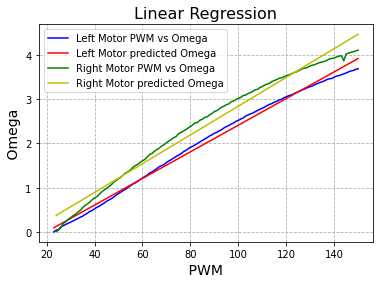

In [30]:
plt.plot(L,data_L_avg_filtered,'-b',label="Left Motor PWM vs Omega")
plt.plot(L,pred_L,'-r',label="Left Motor predicted Omega")
plt.plot(R,data_R_avg_filtered,'-g',label="Right Motor PWM vs Omega")
plt.plot(R,pred_R,'-y',label="Right Motor predicted Omega")
#plt.xlim((-3.5,3.5))
#plt.ylim((0,1.2))
plt.title("Linear Regression",fontsize=16)
plt.xlabel(" PWM ",fontsize=14)
plt.ylabel(" Omega ",fontsize=14)
plt.grid(True,which="both", linestyle='--')
plt.legend()
plt.show()

In [31]:
Coefficients_L_2 = np.polyfit(L,data_L_avg_filtered,2)
Coefficients_R_2 = np.polyfit(R,data_R_avg_filtered,2)

print("Coefficients_L_2: \n" , Coefficients_L_2)
print("Coefficients_R_2: \n" , Coefficients_R_2)

Coefficients_L_2: 
 [-6.92232693e-05  4.20306750e-02 -1.01616927e+00]
Coefficients_R_2: 
 [-1.41526413e-04  5.70553215e-02 -1.28250616e+00]


In [32]:
pred_L_2 = []
pred_R_2 = []
for i in range (L_begin,l):
    pred_L_2.append(Coefficients_L_2[0]*i**2 + Coefficients_L_2[1]*i+ Coefficients_L_2[2])
for i in range (R_begin,l):
    pred_R_2.append(Coefficients_R_2[0]*i**2 + Coefficients_R_2[1]*i+ Coefficients_R_2[2])

In [33]:
pred_L_2 = np.array(pred_L_2).reshape(-1,1)
pred_R_2 = np.array(pred_R_2).reshape(-1,1)

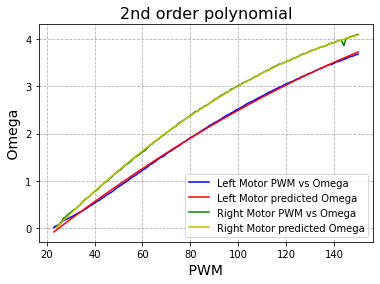

In [34]:
plt.plot(L,data_L_avg_filtered,'-b',label="Left Motor PWM vs Omega")
plt.plot(L,pred_L_2,'-r',label="Left Motor predicted Omega")
plt.plot(R,data_R_avg_filtered,'-g',label="Right Motor PWM vs Omega")
plt.plot(R,pred_R_2,'-y',label="Right Motor predicted Omega")
#plt.xlim((-3.5,3.5))
#plt.ylim((0,1.2))
plt.title("2nd order polynomial",fontsize=16)
plt.xlabel(" PWM ",fontsize=14)
plt.ylabel(" Omega ",fontsize=14)
plt.grid(True,which="both", linestyle='--')
plt.legend()
plt.show()

In [35]:
Coefficients_L_PWM = np.polyfit(data_L_avg_filtered,L,2)
Coefficients_R_PWM = np.polyfit(data_R_avg_filtered,R,2)

print("Coefficients_L_PWM: \n" , Coefficients_L_PWM)
print("Coefficients_R_PWM: \n" , Coefficients_R_PWM)

Coefficients_L_PWM: 
 [ 2.54647926 23.38200899 26.15273771]
Coefficients_R_PWM: 
 [ 3.92203389 12.97286726 26.98219747]


In [36]:
pred_L_PWM = []
pred_R_PWM = []
w = []
for i in range (360):
    w.append(i/100)
    pred_L_PWM.append(Coefficients_L_PWM[0]*(i/100)**2 + Coefficients_L_PWM[1]*(i/100)+ Coefficients_L_PWM[2])
for i in range (360):
    pred_R_PWM.append(Coefficients_R_PWM[0]*(i/100)**2 + Coefficients_R_PWM[1]*(i/100)+ Coefficients_R_PWM[2])


In [37]:
w = np.array(w).reshape(-1,1)
pred_L_PWM = np.array(pred_L_PWM).reshape(-1,1)
pred_R_PWM = np.array(pred_R_PWM).reshape(-1,1)

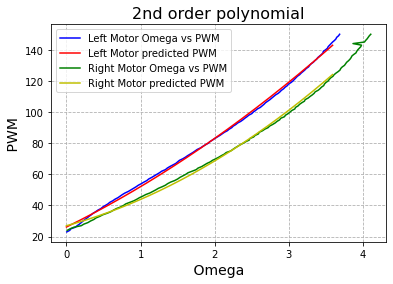

In [38]:
plt.plot(data_L_avg_filtered, L, '-b',label="Left Motor Omega vs PWM")
plt.plot(w,pred_L_PWM,'-r',label="Left Motor predicted PWM")
plt.plot(data_R_avg_filtered, R, '-g',label="Right Motor Omega vs PWM")
plt.plot(w,pred_R_PWM,'-y',label="Right Motor predicted PWM")
#plt.xlim((-3.5,3.5))
#plt.ylim((0,1.2))
plt.title("2nd order polynomial",fontsize=16)
plt.xlabel(" Omega ",fontsize=14)
plt.ylabel(" PWM ",fontsize=14)
plt.grid(True,which="both", linestyle='--')
plt.legend()
plt.show()